In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from bayes_opt import BayesianOptimization
import sys 
import warnings

In [2]:
def load_data(train_path, test_path, test_validate):
    col_names = ["age", "workclass", "education",
                 "marital-status", "occupation", "race",
                 "sex", "hours-per-week",
                 "country", "income"]
    train_data = pd.read_csv(train_path, header=None, names=col_names)
    test_data = pd.read_csv(test_path, header=None, names=col_names)
    dev_data = pd.read_csv(test_validate, header= None, names=col_names)

    return train_data, test_data, dev_data

def standardize_data(train_data, test_data, dev_data):
    # Fit scaler on train data only. Transform training and testing set
    numerical_col = ["age", "hours-per-week"]
    scaler = StandardScaler()
    train_data[numerical_col] = scaler.fit_transform(train_data[numerical_col])
    test_data[numerical_col] = scaler.fit_transform(test_data[numerical_col])
    dev_data[numerical_col] = scaler.fit_transform(dev_data[numerical_col])
    return train_data, test_data, dev_data


def split_data(train_data, test_data, dev_data):

    y_train = train_data["income"]
    X_train = train_data.drop("income", axis=1)

    y_test = test_data['income']
    X_test = test_data.drop("income", axis=1)

    y_dev = dev_data['income']
    X_dev = dev_data.drop("income", axis=1)

    return X_train, y_train, X_test, y_test, X_dev, y_dev
def ohe_data(X_train, y_train, X_test, y_test, X_dev, y_dev):
    """
    One hot encode categorical data.
    Args:
        X_train: Train features as Pandas DataFrame.
        y_train: Train labels as Pandas Series.
        X_test: Test features as Pandas DataFrame.
        y_test: Test labels as Pandas Series.
    Returns:
        X_train_ohe: One-hot encoded training features as Pandas DataFrame.
        y_train_ohe: One-hot encoded training labels as Pandas Series.
        X_test_ohe: One-hot encoded testing features as Pandas DataFrame.
        y_test_ohe: One-hot encoded testing labels as Pandas Series.
    """
    data = pd.concat([X_train, X_test])
    data_1 = pd.concat([X_train, X_dev])

    data_ohe = pd.get_dummies(data)
    data_ohe1 = pd.get_dummies(data_1)
    X_train_ohe = data_ohe[:len(X_train)]
    X_test_ohe = data_ohe[len(X_train):]
    X_dev_ohe = data_ohe1[len(X_train):]
    y_train_ohe = y_train.replace([' <=50K', ' >50K'], [-1, 1])
    y_test_ohe = y_test.replace([' <=50K', ' >50K'], [-1, 1])
    y_dev_ohe = y_dev.replace([' <=50K', ' >50K'], [-1, 1])
    X_train_ohe = np.array(X_train_ohe)
    y_train_ohe = np.array(y_train_ohe)
    X_test_ohe  = np.array(X_test_ohe)
    y_test_ohe  = np.array(y_test_ohe)
    X_dev_ohe = np.array(X_dev_ohe)
    y_dev_ohe= np.array(y_dev_ohe)
    return X_train_ohe, y_train_ohe, X_test_ohe, y_test_ohe, X_dev_ohe, y_dev_ohe
def preprocess_data():
    path_to_train = "income.train.txt"
    path_to_test = "income.test.txt"
    path_to_validate = "income.dev.txt"
    # Load the data
    print("Loading data...")
    train_data, test_data, dev_data = load_data(path_to_train, path_to_test,path_to_validate)
    # Standardize the data
    print("Standardizing the data...")
    train_data, test_data ,dev_data= standardize_data(train_data, test_data,dev_data)
    # Split data into features and labels
    X_train, y_train, X_test, y_test,X_dev, y_dev = split_data(train_data, test_data,dev_data)
    # One-hot encode the data
    X_train, y_train, X_test, y_test, X_dev, y_dev = ohe_data(X_train, y_train, X_test, y_test,X_dev,y_dev)
    
    return X_train, y_train, X_test, y_test, X_dev, y_dev
if __name__ == "__main__":

    X_train, y_train, X_test, y_test, X_dev, y_dev = preprocess_data()
    print("\nData sucessfully loaded.")


Loading data...
Standardizing the data...

Data sucessfully loaded.


In [3]:
def warn(*args,**kwargs):
    pass
warnings.warn = warn

For Depth =  1
For number of trees =  10
Accuracy score for training data  75.16000000000001
Accuracy score for Validation data  76.06100795755968
Accuracy score for Testing data  73.93939393939394

For number of trees =  20
Accuracy score for training data  75.16000000000001
Accuracy score for Validation data  76.06100795755968
Accuracy score for Testing data  73.93939393939394

For number of trees =  40
Accuracy score for training data  75.16000000000001
Accuracy score for Validation data  76.06100795755968
Accuracy score for Testing data  73.93939393939394

For number of trees =  60
Accuracy score for training data  75.16000000000001
Accuracy score for Validation data  76.06100795755968
Accuracy score for Testing data  73.93939393939394

For number of trees =  80
Accuracy score for training data  75.16000000000001
Accuracy score for Validation data  76.06100795755968
Accuracy score for Testing data  73.93939393939394

For number of trees =  100
Accuracy score for training data  75.1

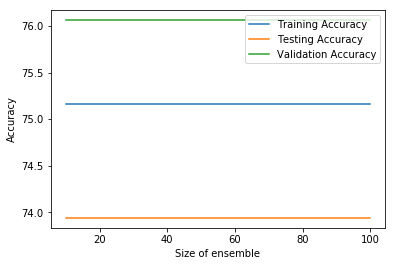

For Depth =  2
For number of trees =  10
Accuracy score for training data  78.372
Accuracy score for Validation data  78.97877984084882
Accuracy score for Testing data  76.41025641025641

For number of trees =  20
Accuracy score for training data  78.372
Accuracy score for Validation data  78.97877984084882
Accuracy score for Testing data  76.41025641025641

For number of trees =  40
Accuracy score for training data  78.372
Accuracy score for Validation data  78.97877984084882
Accuracy score for Testing data  76.41025641025641

For number of trees =  60
Accuracy score for training data  78.372
Accuracy score for Validation data  78.97877984084882
Accuracy score for Testing data  76.41025641025641

For number of trees =  80
Accuracy score for training data  78.372
Accuracy score for Validation data  78.97877984084882
Accuracy score for Testing data  76.41025641025641

For number of trees =  100
Accuracy score for training data  78.372
Accuracy score for Validation data  78.9787798408488

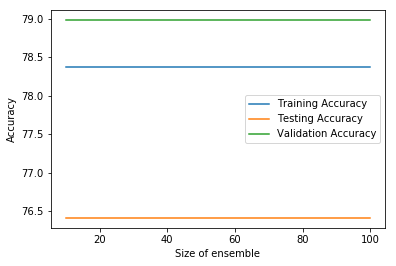

For Depth =  3
For number of trees =  10
Accuracy score for training data  80.444
Accuracy score for Validation data  81.29973474801061
Accuracy score for Testing data  79.16083916083916

For number of trees =  20
Accuracy score for training data  80.52
Accuracy score for Validation data  81.36604774535809
Accuracy score for Testing data  79.06759906759908

For number of trees =  40
Accuracy score for training data  80.508
Accuracy score for Validation data  81.36604774535809
Accuracy score for Testing data  79.06759906759908

For number of trees =  60
Accuracy score for training data  80.512
Accuracy score for Validation data  81.36604774535809
Accuracy score for Testing data  79.11421911421911

For number of trees =  80
Accuracy score for training data  80.512
Accuracy score for Validation data  81.36604774535809
Accuracy score for Testing data  79.06759906759908

For number of trees =  100
Accuracy score for training data  80.512
Accuracy score for Validation data  81.36604774535809

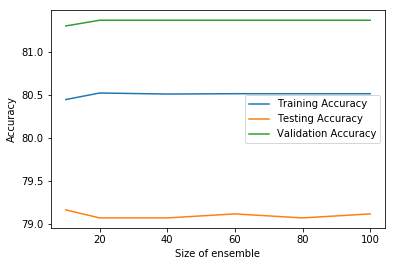

For Depth =  5
For number of trees =  10
Accuracy score for training data  82.416
Accuracy score for Validation data  82.82493368700266
Accuracy score for Testing data  81.81818181818183

For number of trees =  20
Accuracy score for training data  82.364
Accuracy score for Validation data  82.89124668435012
Accuracy score for Testing data  82.05128205128204

For number of trees =  40
Accuracy score for training data  82.392
Accuracy score for Validation data  82.95755968169762
Accuracy score for Testing data  81.67832167832168

For number of trees =  60
Accuracy score for training data  82.38799999999999
Accuracy score for Validation data  83.15649867374006
Accuracy score for Testing data  81.81818181818183

For number of trees =  80
Accuracy score for training data  82.376
Accuracy score for Validation data  83.09018567639257
Accuracy score for Testing data  81.72494172494173

For number of trees =  100
Accuracy score for training data  82.42399999999999
Accuracy score for Validation 

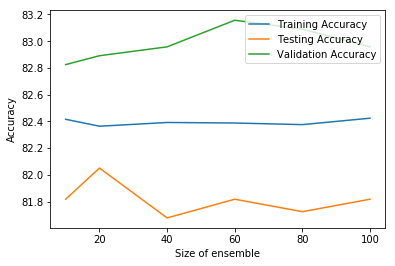

For Depth =  10
For number of trees =  10
Accuracy score for training data  85.604
Accuracy score for Validation data  84.21750663129973
Accuracy score for Testing data  81.91142191142191

For number of trees =  20
Accuracy score for training data  85.676
Accuracy score for Validation data  83.95225464190982
Accuracy score for Testing data  81.81818181818183

For number of trees =  40
Accuracy score for training data  85.60799999999999
Accuracy score for Validation data  83.81962864721486
Accuracy score for Testing data  81.91142191142191

For number of trees =  60
Accuracy score for training data  85.69200000000001
Accuracy score for Validation data  83.81962864721486
Accuracy score for Testing data  82.23776223776224

For number of trees =  80
Accuracy score for training data  85.79599999999999
Accuracy score for Validation data  83.88594164456234
Accuracy score for Testing data  82.14452214452214

For number of trees =  100
Accuracy score for training data  85.736
Accuracy score for

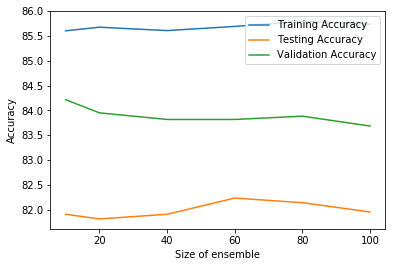

In [4]:
dep=[1,2,3,5,10]
n_trees=[10,20,40,60,80,100]
for depth in dep:
    plt_valid=[]
    plt_train=[]
    plt_test=[]
    base = DecisionTreeClassifier(max_depth=depth)
    print("For Depth = " ,depth)
    for trees in n_trees:
        print("For number of trees = ", trees)
        clf=BaggingClassifier(base_estimator = base ,n_estimators=int(trees))
        clf.fit(X_train,y_train)
        y_pred=clf.predict(X_train)
        plt_train.append(accuracy_score(y_pred,y_train)*100)
        print ("Accuracy score for training data ",accuracy_score(y_pred,y_train)*100)
        y_pred=clf.predict(X_dev)
        print ("Accuracy score for Validation data ",accuracy_score(y_pred,y_dev)*100)
        plt_valid.append(accuracy_score(y_pred,y_dev)*100)
        y_pred=clf.predict(X_test)
        print ("Accuracy score for Testing data ",accuracy_score(y_pred,y_test)*100)
        plt_test.append(accuracy_score(y_pred,y_test)*100)
        print()
    print()
    plt.xlabel("Size of ensemble")
    plt.ylabel("Accuracy")
    plt.plot(n_trees,plt_train,label = 'Training Accuracy')
    plt.plot(n_trees,plt_test, label = 'Testing Accuracy')
    plt.plot(n_trees,plt_valid, label = 'Validation Accuracy')
    plt.legend()
    plt.show()
    

For Depth = 1


For number of iterations =  10
Accuracy score for training data  81.28
Accuracy score for Validation data  81.76392572944296
Accuracy score for Testing data  81.11888111888112

For number of iterations =  20
Accuracy score for training data  82.876
Accuracy score for Validation data  82.62599469496021
Accuracy score for Testing data  82.47086247086247

For number of iterations =  40
Accuracy score for training data  83.43599999999999
Accuracy score for Validation data  82.62599469496021
Accuracy score for Testing data  83.12354312354312

For number of iterations =  60
Accuracy score for training data  83.524
Accuracy score for Validation data  82.89124668435012
Accuracy score for Testing data  83.21678321678321

For number of iterations =  80
Accuracy score for training data  83.548
Accuracy score for Validation data  82.89124668435012
Accuracy score for Testing data  83.54312354312354

For number of iterations =  100
Accuracy score for training data  83.556
Accuracy sc

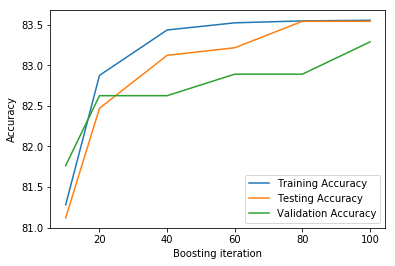

For Depth = 2


For number of iterations =  10
Accuracy score for training data  82.976
Accuracy score for Validation data  83.0238726790451
Accuracy score for Testing data  81.72494172494173

For number of iterations =  20
Accuracy score for training data  83.568
Accuracy score for Validation data  83.35543766578249
Accuracy score for Testing data  82.7039627039627

For number of iterations =  40
Accuracy score for training data  83.87599999999999
Accuracy score for Validation data  84.01856763925728
Accuracy score for Testing data  82.33100233100234

For number of iterations =  60
Accuracy score for training data  84.14399999999999
Accuracy score for Validation data  83.88594164456234
Accuracy score for Testing data  83.12354312354312

For number of iterations =  80
Accuracy score for training data  84.188
Accuracy score for Validation data  84.08488063660478
Accuracy score for Testing data  83.21678321678321

For number of iterations =  100
Accuracy score for training data  84.436
A

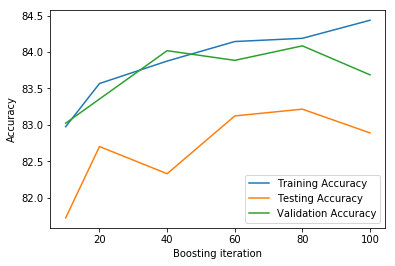

For Depth = 3


For number of iterations =  10
Accuracy score for training data  83.25200000000001
Accuracy score for Validation data  83.81962864721486
Accuracy score for Testing data  81.67832167832168

For number of iterations =  20
Accuracy score for training data  83.572
Accuracy score for Validation data  83.35543766578249
Accuracy score for Testing data  82.0979020979021

For number of iterations =  40
Accuracy score for training data  84.28
Accuracy score for Validation data  83.48806366047745
Accuracy score for Testing data  82.51748251748252

For number of iterations =  60
Accuracy score for training data  84.516
Accuracy score for Validation data  83.28912466843501
Accuracy score for Testing data  83.26340326340326

For number of iterations =  80
Accuracy score for training data  84.836
Accuracy score for Validation data  82.89124668435012
Accuracy score for Testing data  83.35664335664336

For number of iterations =  100
Accuracy score for training data  85.19200000000001
A

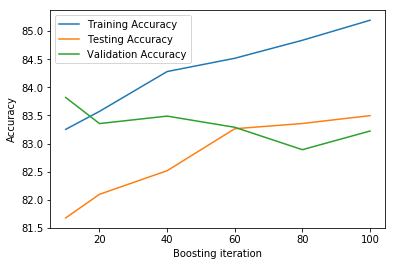

In [5]:
dep=[1,2,3]
boost_iter=[10,20,40,60,80,100]
for depth in dep:
    base = DecisionTreeClassifier(max_depth=depth)
    plt_valid=[]
    plt_train=[]
    plt_test=[]
    print("For Depth =" ,depth)
    print()
    print()
    for no_iter in boost_iter:
        print("For number of iterations = ", no_iter)
        clf=AdaBoostClassifier(base_estimator = base ,n_estimators= no_iter)
        clf.fit(X_train,y_train)
        y_pred=clf.predict(X_train)
        plt_train.append(accuracy_score(y_pred,y_train)*100)
        print ("Accuracy score for training data ",accuracy_score(y_pred,y_train)*100)
        y_pred=clf.predict(X_dev)
        print ("Accuracy score for Validation data ",accuracy_score(y_pred,y_dev)*100)
        plt_valid.append(accuracy_score(y_pred,y_dev)*100)
        y_pred=clf.predict(X_test)
        print ("Accuracy score for Testing data ",accuracy_score(y_pred,y_test)*100)
        plt_test.append(accuracy_score(y_pred,y_test)*100)
        print()
    print()
    plt.xlabel("Boosting iteration")
    plt.ylabel("Accuracy")
    plt.plot(boost_iter,plt_train,label = 'Training Accuracy')
    plt.plot(boost_iter,plt_test, label = 'Testing Accuracy')
    plt.plot(boost_iter,plt_valid, label = 'Validation Accuracy')
    plt.legend()
    plt.show()
    

In [6]:
def bagging(max_depth,n_estimators):
    base = DecisionTreeClassifier(max_depth=int(max_depth))
    clf=BaggingClassifier(base_estimator = base ,n_estimators=int(n_estimators))
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_dev)
    score =accuracy_score(y_pred,y_dev)*100
    return score
         

In [ ]:
optimizer = BayesianOptimization(bagging,{"max_depth" :(1,20),
             "n_estimators":(1,100)})
optimizer.maximize(n_iter=50)

Initialization
------------------------------------------------------------
 Step |   Time |      Value |   max_depth |   n_estimators | 
    1 | 00m11s |   83.55438 |     14.9785 |        90.8845 | 
    2 | 00m07s |   83.81963 |     12.7994 |        61.9822 | 
    3 | 00m01s |   76.06101 |      1.8765 |        75.5831 | 
    4 | 00m09s |   83.42175 |     16.3221 |        79.3900 | 
    5 | 00m01s |   78.97878 |      2.4606 |        60.8549 | 
Bayesian Optimization
------------------------------------------------------------
 Step |   Time |      Value |   max_depth |   n_estimators | 
    6 | 00m13s |   83.28912 |     18.1032 |        88.0474 | 
    7 | 00m09s |   83.95225 |     13.5102 |        66.3859 | 
    8 | 00m12s |   83.62069 |     13.7605 |        64.8663 | 
    9 | 00m10s |   83.81963 |      9.9650 |        65.6596 | 
   10 | 00m15s |   83.75332 |     13.9308 |        85.7979 | 
   11 | 00m13s |   83.62069 |     12.8608 |        71.8009 | 
   12 | 00m10s |   83.88594 |     1

In [92]:
max=0
bagging_hyperparameter=[]
for i in optimizer.Y:
    if max<i:
        bagging_hyperparameter.append(i)
        max=i
print("The number of hyperparameters that bayesian optimization chose was ",len(bagging_hyperparameter))
print("and the values are")
print(bagging_hyperparameter)

The number of hyperparameters that bayesian optimization chose was  5
and the values are
[83.22281167108754, 83.35543766578249, 83.95225464190982, 84.01856763925728, 84.08488063660478]


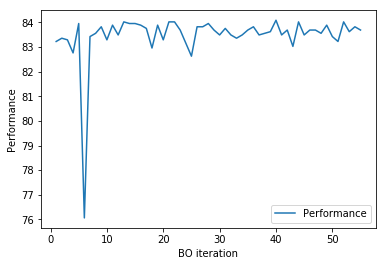

In [93]:

x=list(range(1,56))
plt.xlabel("BO iteration")
plt.ylabel("Performance")
plt.plot(x,optimizer.Y,label = 'Performance')
plt.legend()
plt.show()

In [94]:
def boosting(max_depth,n_estimators):
    base = DecisionTreeClassifier(max_depth=int(max_depth))
    clf=AdaBoostClassifier(base_estimator = base ,n_estimators=int(n_estimators))
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_dev)
    score =accuracy_score(y_pred,y_dev)*100
    return score

In [95]:
optimizer = BayesianOptimization(boosting,{"max_depth" :(1,20),
             "n_estimators":(1,100)})
optimizer.maximize(n_iter=50)

Initialization
------------------------------------------------------------
 Step |   Time |      Value |   max_depth |   n_estimators | 
    1 | 00m01s |   82.82493 |      6.8219 |        19.9123 | 
    2 | 00m02s |   78.44828 |     15.7288 |        18.1622 | 
    3 | 00m00s |   82.69231 |      1.6695 |        32.5816 | 
    4 | 00m07s |   80.90186 |     18.1002 |        95.3838 | 
    5 | 00m05s |   80.50398 |      7.6337 |        66.7842 | 
Bayesian Optimization
------------------------------------------------------------
 Step |   Time |      Value |   max_depth |   n_estimators | 
    6 | 00m01s |   82.62599 |      1.0000 |        20.8103 | 
    7 | 00m03s |   83.48806 |      5.8331 |        26.9003 | 
    8 | 00m04s |   83.55438 |      4.9772 |        25.8007 | 
    9 | 00m05s |   83.55438 |      4.7597 |        25.4539 | 
   10 | 00m05s |   83.48806 |      4.6108 |        25.9291 | 
   11 | 00m12s |   80.83554 |     14.7937 |        85.2174 | 
   12 | 00m05s |   82.29443 |      

In [96]:
max=0
boosting_hyperparameter=[]
for i in optimizer.Y:
    if max<i:
        boosting_hyperparameter.append(i)
        max=i
print("The number of hyperparameters that bayesian optimization chose was ",len(boosting_hyperparameter))
print("and the values are")
print(boosting_hyperparameter)

The number of hyperparameters that bayesian optimization chose was  5
and the values are
[82.82493368700266, 83.48806366047745, 83.55437665782493, 83.6870026525199, 84.08488063660478]


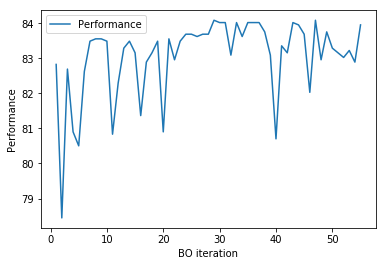

In [97]:
x=list(range(1,56))
plt.xlabel("BO iteration")
plt.ylabel("Performance")
plt.plot(x,optimizer.Y,label = 'Performance')
plt.legend()
plt.show()